In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from matplotlib import font_manager, rc

current_font_list = matplotlib.rcParams['font.family']

font_path = "C:/Windows/Fonts/H2GTRE.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
# rc('font', family=font)
matplotlib.rcParams['font.family'] = [font]+current_font_list
print(matplotlib.rcParams['font.family'])

['HYGothic-Extra', 'sans-serif']


In [2]:
pd_data = pd.read_csv('이륜차신고현황_시도별_20230310151127.csv', encoding='cp949', header=[0,1,2])
# print(pd_data)
pd_data.drop(('시도명(1)','시도명(1)','시도명(1)'), axis=1, inplace=True)
pd_data.columns.names = ['시점','소유','크기']
pd_data
a = pd_data.set_index(('시군구(1)','시군구(1)','시군구(1)'))
a
b = a.stack(level=0)
b
b.index.names = ['지역','시점']
c=b.swaplevel(0,1)
c
g=c.stack(level=0)
g=g.reset_index()
g

크기,시점,지역,소유,경형,대형,소계,소형,중형
0,2023.01,금정구,계,350,575,8175,2072,5178
1,2023.01,금정구,관용,5,2,79,4,68
2,2023.01,금정구,자가용,345,573,8096,2068,5110
3,2023.01,기장군,계,311,627,5886,1473,3475
4,2023.01,기장군,관용,2,0,68,8,58
5,2023.01,기장군,자가용,309,627,5818,1465,3417
6,2023.01,남구,계,451,941,10764,2408,6964
7,2023.01,남구,관용,3,0,31,10,18
8,2023.01,남구,자가용,448,941,10733,2398,6946
9,2023.01,동구,계,185,321,4478,963,3009


In [3]:
g.insert(0,'년',g['시점'].apply(lambda x: str(x).split('.')[0]))
g.insert(1,'월',g['시점'].apply(lambda x: str(x).split('.')[1]))
g.drop('소계',axis=1,inplace=True)
g

크기,년,월,시점,지역,소유,경형,대형,소형,중형
0,2023,01,2023.01,금정구,계,350,575,2072,5178
1,2023,01,2023.01,금정구,관용,5,2,4,68
2,2023,01,2023.01,금정구,자가용,345,573,2068,5110
3,2023,01,2023.01,기장군,계,311,627,1473,3475
4,2023,01,2023.01,기장군,관용,2,0,8,58
5,2023,01,2023.01,기장군,자가용,309,627,1465,3417
6,2023,01,2023.01,남구,계,451,941,2408,6964
7,2023,01,2023.01,남구,관용,3,0,10,18
8,2023,01,2023.01,남구,자가용,448,941,2398,6946
9,2023,01,2023.01,동구,계,185,321,963,3009


크기,년,월,시점,지역,소유,경형,대형,소형,중형
0,2023,01,2023.01,금정구,계,350,575,2072,5178
1,2023,01,2023.01,금정구,관용,5,2,4,68
2,2023,01,2023.01,금정구,자가용,345,573,2068,5110
3,2023,01,2023.01,기장군,계,311,627,1473,3475
4,2023,01,2023.01,기장군,관용,2,0,8,58
5,2023,01,2023.01,기장군,자가용,309,627,1465,3417
6,2023,01,2023.01,남구,계,451,941,2408,6964
7,2023,01,2023.01,남구,관용,3,0,10,18
8,2023,01,2023.01,남구,자가용,448,941,2398,6946
9,2023,01,2023.01,동구,계,185,321,963,3009


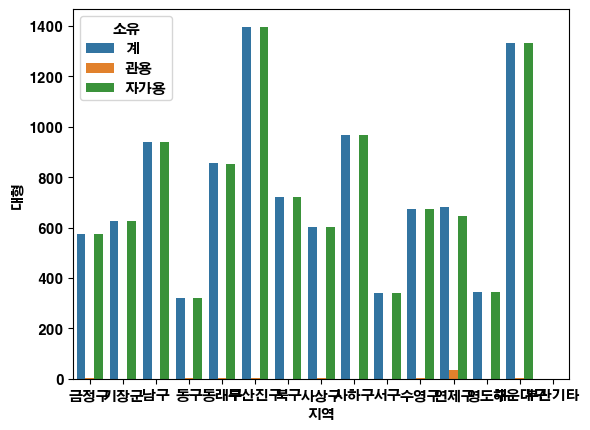

In [4]:
sns.barplot(data=g, x='지역', y='대형', hue='소유')
g

C:\Users\ITPS\AppData\Local\Temp\ipykernel_12544\1609536856.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  sns.heatmap(data=g.pivot('지역','소유',n), annot=True, fmt='.0f', ax=e)
C:\Users\ITPS\AppData\Local\Temp\ipykernel_12544\1609536856.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  sns.heatmap(data=g.pivot('지역','소유',n), annot=True, fmt='.0f', ax=e)
C:\Users\ITPS\AppData\Local\Temp\ipykernel_12544\1609536856.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  sns.heatmap(data=g.pivot('지역','소유',n), annot=True, fmt='.0f', ax=e)
C:\Users\ITPS\AppData\Local\Temp\ipykernel_12544\1609536856.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  sns.heatmap(data=g.pivot('지역','소유',n), annot=True, fmt='.0f', ax=e)


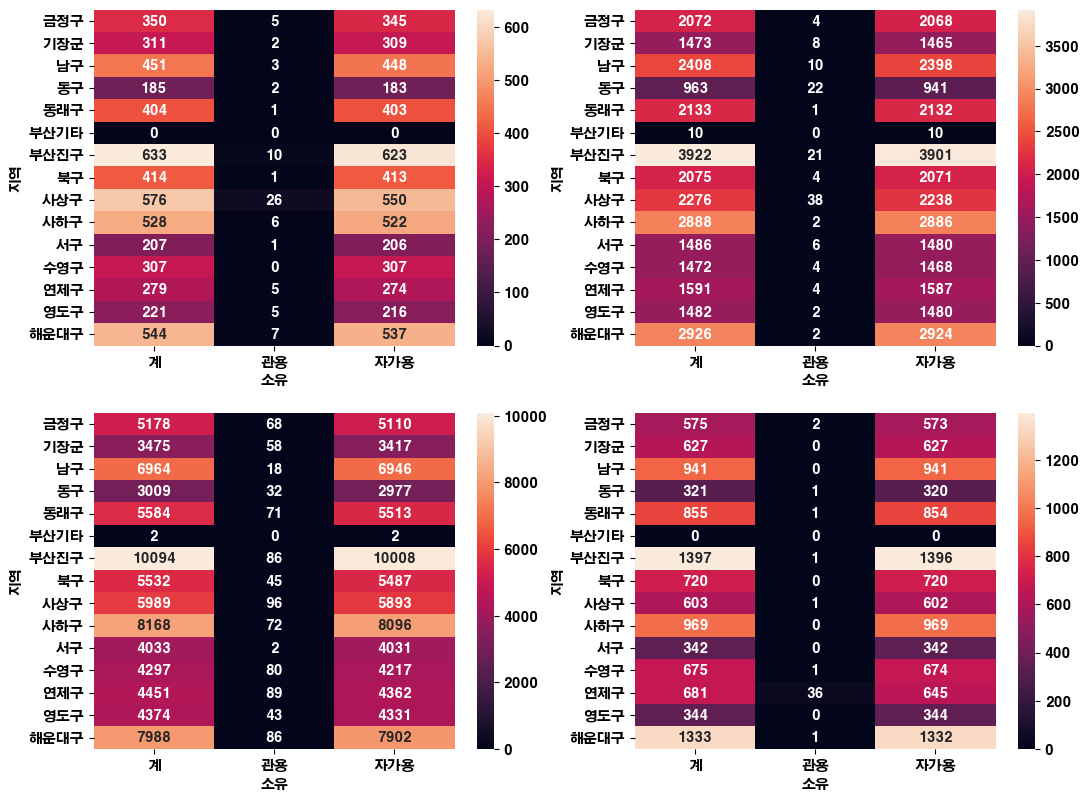

In [5]:
fig = plt.figure(figsize=(6.4*2,4.8*2))
a = fig.add_subplot(2,2,1)
b = fig.add_subplot(2,2,2)
c = fig.add_subplot(2,2,3)
d = fig.add_subplot(2,2,4)

for n,e in [('경형',a),('소형',b),('중형',c),('대형',d)]:
#     print(n,e)
    sns.heatmap(data=g.pivot('지역','소유',n), annot=True, fmt='.0f', ax=e)

# d_heat = g.pivot('지역','소유','대형')
# sns.heatmap(data=d_heat, annot=True, fmt='.0f',vmax=d_heat['계'].mean())

In [36]:
x=[]
for i,n in enumerate(g['지역'].unique()):
    print(i+1,n)
    for e in range(0,3):
        x.append(i+1)
print()
y=[]
for e in range(0,15):
    for i,n in enumerate(g['소유'].unique()):
        y.append(i+1)
        if(e==0):
            print(i+1,n)
print()
z = g['소형']
print(z)

1 금정구
2 기장군
3 남구
4 동구
5 동래구
6 부산진구
7 북구
8 사상구
9 사하구
10 서구
11 수영구
12 연제구
13 영도구
14 해운대구
15 부산기타

1 계
2 관용
3 자가용

0     2072
1        4
2     2068
3     1473
4        8
5     1465
6     2408
7       10
8     2398
9      963
10      22
11     941
12    2133
13       1
14    2132
15    3922
16      21
17    3901
18    2075
19       4
20    2071
21    2276
22      38
23    2238
24    2888
25       2
26    2886
27    1486
28       6
29    1480
30    1472
31       4
32    1468
33    1591
34       4
35    1587
36    1482
37       2
38    1480
39    2926
40       2
41    2924
42      10
43       0
44      10
Name: 소형, dtype: int64


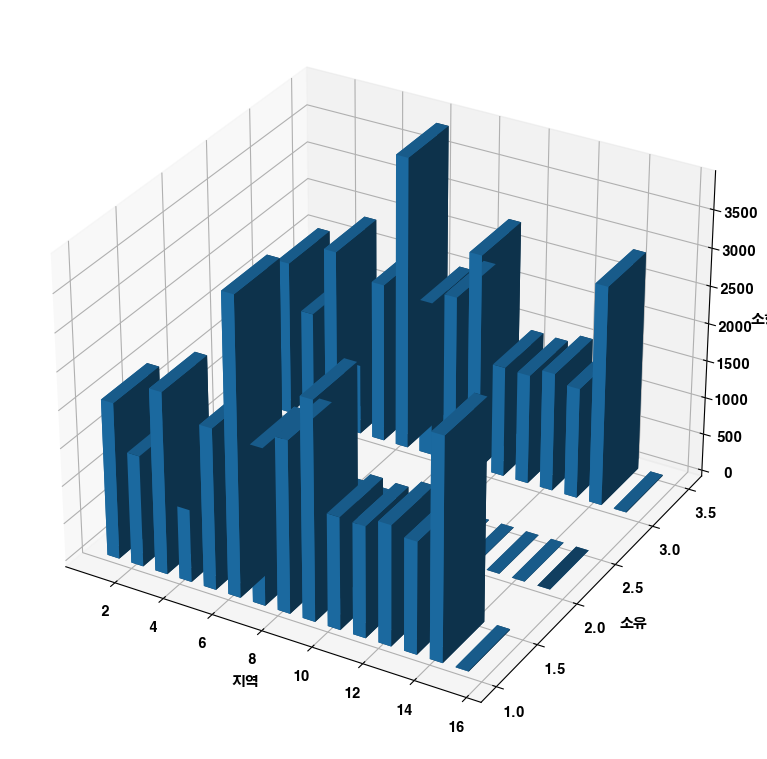

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(6.4*2,4.8*2))
ax = fig.add_subplot(1,1,1, projection='3d')



ax.bar3d(x, y, 0, 0.5, 0.5, z)
ax.set_xlabel('지역')
ax.set_ylabel('소유')
ax.set_zlabel('소형')
plt.show()